## **SUHASH REDDY IMMAREDDY  -  45693242  -  DATA-SCIENCE  -  PORTFOLIO-3**

# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

%matplotlib inline

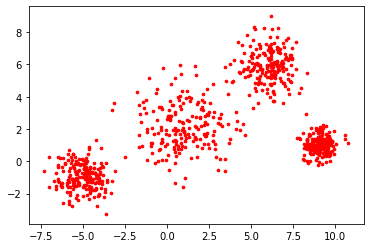

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='red')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [3]:
std = data.std()
mean = data.mean()
np.random.seed(5)

#### claculating the standard deviation and mean from the data with a random seed of 5 and can be further used to generate four random centers

In [4]:
k = 4
ss = ['green', 'blue', 'yellow', 'cyan']

#### setting the no of clusters to 4 

In [5]:
centres = np.random.randn(k,2)*std + mean  ### centroids

#### generating the four random centers 

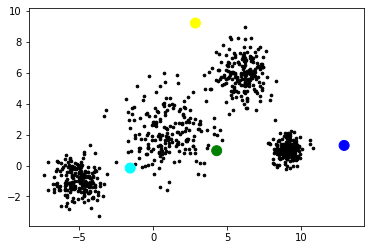

In [6]:
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(centres[:,0], centres[:,1],s=100, c=ss)
plt.show()

#### plotting the four random centers with the rndom data that we have generated 

In [7]:
print(data)

[[ 1.66184123  1.50369477]
 [ 4.64615678  1.62186181]
 [ 1.16441476  4.37372168]
 ...
 [-5.94762563  0.05925507]
 [-5.5282781  -0.16683908]
 [-5.02162618 -0.15647292]]


In [8]:
d1 = pd.DataFrame({
    'X_value': data[:, 0],
    'Y_value': data[:, -1]
})

In [9]:
print(d1.head())

    X_value   Y_value
0  1.661841  1.503695
1  4.646157  1.621862
2  1.164415  4.373722
3 -0.363849  1.112545
4  1.281405  1.505195


In [10]:

print(centres)

[[ 4.29560355  0.96057399]
 [12.88931852  1.30085095]
 [ 2.86320097  9.22518032]
 [-1.53762715 -0.16579133]]


## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

In [11]:
centroids = {
    1: [centres[0][0], centres[0][1]], 2: [centres[1][0], centres[1][1]], 3: [centres[2][0], centres[2][1]], 4: [centres[3][0], centres[3][1]]
    }

#### Converting the random centers into a dictionary with set of key value pair

In [12]:
# Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['X_value'] - centroids[i][0]) ** 2
                + (df['Y_value'] - centroids[i][1]) ** 2
            )
        )
    colmap = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'cyan'}
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: float(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

#### Using the Sqrt((x-x1)*2 + (y-y1)*2) which is euclidian distance we can calculate the points that are closer to the generated centroids

In [13]:
df = assignment(d1, centroids)
print(df.head())
sss =[]
for i in range(0,800):
    sss.append(df['color'][i])

    X_value   Y_value  distance_from_1  distance_from_2  distance_from_3  \
0  1.661841  1.503695         2.689179        11.229310         7.814384   
1  4.646157  1.621862         0.748458         8.249410         7.809570   
2  1.164415  4.373722         4.631838        12.120887         5.140285   
3 -0.363849  1.112545         4.661930        13.254505         8.730905   
4  1.281405  1.505195         3.063006        11.609712         7.880371   

   distance_from_4  closest  color  
0         3.608848      1.0  green  
1         6.436994      1.0  green  
2         5.282822      1.0  green  
3         1.735483      4.0   cyan  
4         3.277062      1.0  green  


#### Plotting the 800 random points with the color that is appropriate with respect to the closeness with the centroids

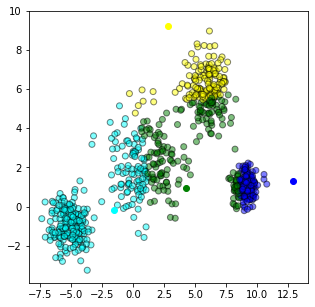

In [14]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['X_value'], df['Y_value'], color=df['color'], alpha=0.5, edgecolor='k')
colmap = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'cyan'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

In [15]:
#update stage
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['X_value'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Y_value'])
    return k

centroids = update(centroids)

#### we re calculate the new centroids from the older centroid and updating

In [16]:
suhash = 2

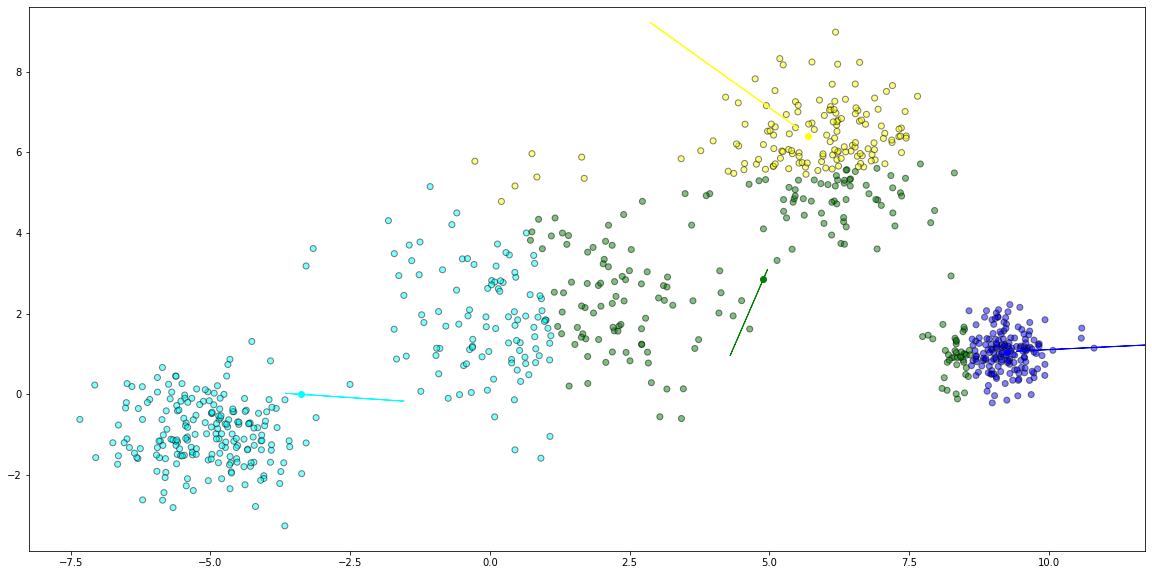

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()
plt.scatter(df['X_value'], df['Y_value'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0, head_length=0.75, fc=colmap[i], ec=colmap[i])
plt.show()

#### This is the first itteration where based on the colored groups we now calculate the new centroids for each group

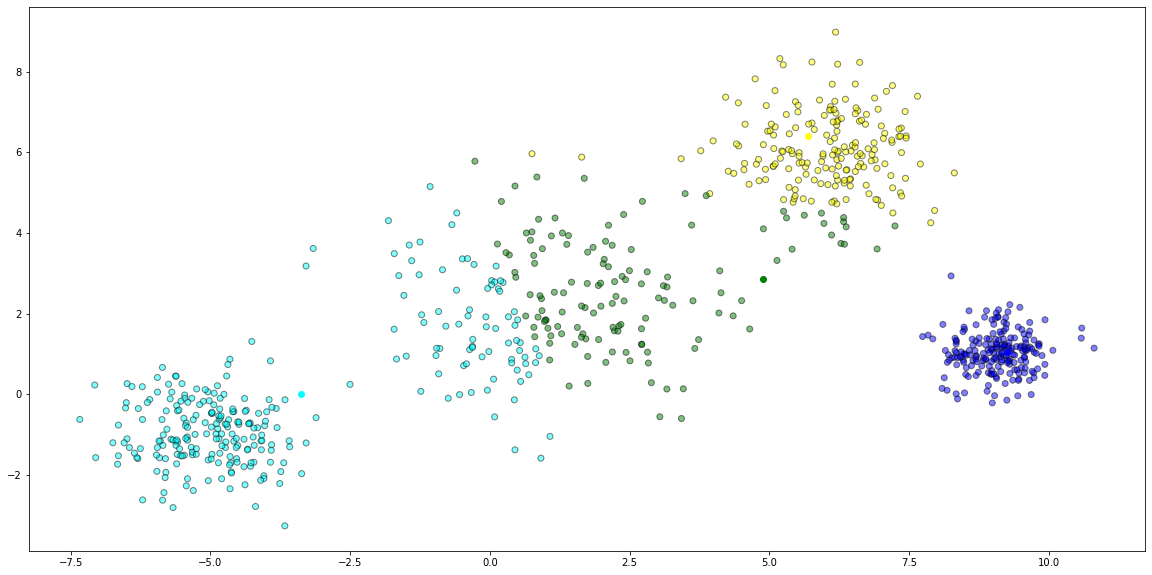

In [18]:
#Repeat Assignment Stage
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(20, 10))
plt.scatter(df['X_value'], df['Y_value'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

#### the figure obve is the second iteration of the kmeans clustering, we can see that the some of the surrounding points were turned to new color

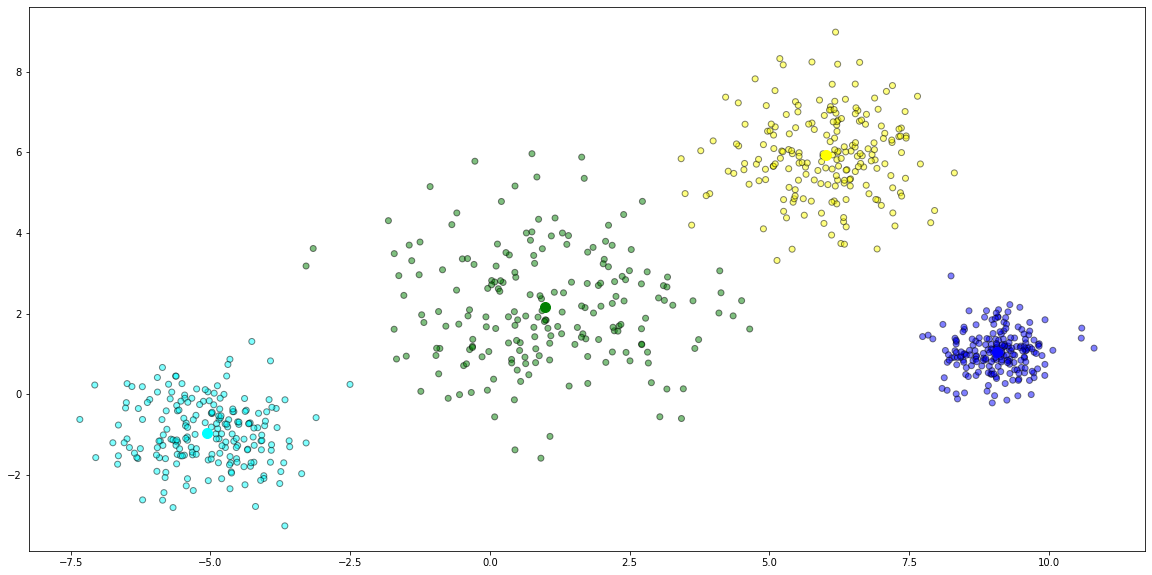



It took 6 Itterations in order to get the centroids position to be constant


In [19]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    suhash += 1
    if closest_centroids.equals(df['closest']):
        
        break

fig = plt.figure(figsize=(20, 10))
plt.scatter(df['X_value'], df['Y_value'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], s=100)
plt.show()

print("\n")
print("It took " + str(suhash) + " Itterations in order to get the centroids position to be constant")

### It took a total of "six" Iterrations in order for the centroids to be constant

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

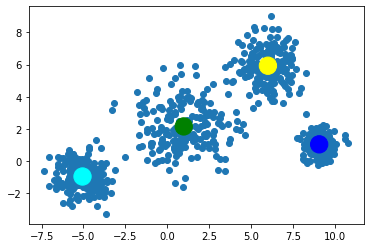

In [21]:
ssss = ["cyan","blue","green", "yellow"]
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)
plt.scatter(data[:,0], data[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=ssss)
plt.show()

In [1]:
import json
import os

In [2]:
notebooks_to_merge = [file for file in os.listdir(os.getcwd()) if file.endswith('.ipynb')]
notebooks_to_merge.sort()
print(notebooks_to_merge)

['Portfolio1.ipynb', 'Portfolio2.ipynb', 'Portfolio3.ipynb']


In [8]:
def combine_ipynb_files(list_of_notebooks, combined_file_name):
    with open (notebooks_to_merge[0], mode = 'r', encoding = 'utf-8') as f:
        a = json.load (f)
    for notebook in notebooks_to_merge[1:]:
        with open (notebook, mode = 'r', encoding = 'utf-8') as f:
            b = json.load(f)
            a['cells'].extend (b['cells'])
    with open(combined_file_name, mode='w', encoding='utf-8') as f:
        json.dump(a, f)
    print('Generated file: \"{}\".'.format(combined_file_name))

    return (os.path.realpath(combined_file_name))
combine_ipynb_files(notebooks_to_merge,"Portfolio_All".ipynb)


NameError: name 'combined_file_name' is not defined